In [156]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [157]:
trained_data_complete = np.loadtxt("train32.csv",
                 delimiter=",", dtype=float)

In [158]:
X_train_data = trained_data_complete[:64,:2]
Y_train_data = trained_data_complete[:64,2:3]
X_validation_data = trained_data_complete[64:79,:2]
Y_validation_data = trained_data_complete[64:79,2:3]

In [159]:
def normalize(X_data_set):
    X1 = X_data_set[:X_data_set.shape[0],:1]
    X2 = X_data_set[:X_data_set.shape[0],1:2]
    mu1 = np.mean(X1)
    sd1 = np.std(X1)
    mu2 = np.mean(X2)
    sd2 = np.std(X2)
    for i in range(X_data_set.shape[0]):
        X_data_set[i][0] = (X_data_set[i][0]-mu1)/sd1
        X_data_set[i][1] = (X_data_set[i][1]-mu2)/sd2
    return X_data_set

Since we already find out the best model is of degree 3 , We will take degree 4 which is overfit

In [160]:
def getXmat(k,data_set):
    data_set = normalize(data_set)
    total_col = (k+1)*(k+2)//2
    total_row = len(data_set)
    X_mat=[]
    
    for i in range(total_row):
            temp_array = []
            for u in range(k+1):
                for v in range(u+1):
                    temp_array.append(data_set[i][0]**(u-v)*data_set[i][1]**v)
            X_mat.append(temp_array)        
                  
    return X_mat 
  
X = getXmat(4,X_train_data)
X=np.asarray(X)

In [161]:
def getbeta(lambda_val):
    
    X_transpose= X.transpose()
    X_prod=np.dot(X_transpose,X)  # Xt*X
    Psuedo_inverse=np.linalg.pinv( X_prod + lambda_val* np.identity( len( np.linalg.pinv(X_prod) ) ) ) # (Xt*X + lambda * I) -1
    prod=np.dot(Psuedo_inverse,X_transpose) # (XT * X + lambda I)-1 * XT
    beta=np.dot(prod,Y_train_data)        # (X*T * X + lamnda*I ) -1 * XT * Y
    return beta

In [162]:
def getMeansquareerror (Y_pred, Y_actual) :
    error = 0
    for i in range(len(Y_pred)):
        error = error + (Y_pred[i]-Y_actual[i])**2
        
    MSE = error/(len(Y_pred))
    
    return MSE

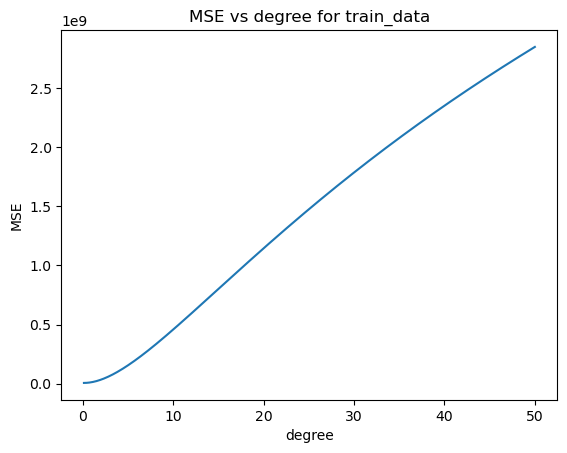

0.1
7107185.877995314


In [164]:
# MSE test vs lambda 

Y_actual = Y_train_data
temp = 0.0

MSE_values = []
while(temp<50):
    beta = getbeta(temp)
    temp = temp + 0.1
    Y_pred = np.dot(X,beta)
    err = float(getMeansquareerror(Y_pred,Y_actual))
    MSE_values.append(err)
    
lambdas = []
t = 0
for i in range(500):
    t+=0.1
    lambdas.append(t)
    
# print(MSE_values)    
plt.title("MSE vs degree for train_data")
plt.xlabel("degree")
plt.ylabel("MSE")
plt.plot(lambdas, MSE_values)
plt.show()

min_index = MSE_values.index(min(MSE_values))
optimal_lambda = 0.1*(min_index+1)
print(optimal_lambda)
print(min(MSE_values))

# MSE USING OPTIMAL LAMBDA FOR TRAIN AND TEST DATA

In [ ]:
min_index = MSE_values.index(min(MSE_values))
optimal_lambda = 0.1*min_index
best_model_MSE_for_train_data = min(MSE_values)
test_data = np.loadtxt("test32.csv", delimiter=",", dtype=float)
MSE_test = []
temp = 0.1
XX = getXmat(4,test_data[:20,:2])
XX = np.asarray(XX)
XX_transpose= XX.transpose()
XX_prod=np.dot(XX_transpose,XX)  # Xt*X
while(temp<50):
    Psuedo_inverse=np.linalg.pinv( XX_prod + temp* np.identity( len( np.linalg.pinv(XX_prod) ) ) ) # (Xt*X + lambda * I) -1
    prod=np.dot(Psuedo_inverse,XX_transpose) # (XT * X + lambda I)-1 * XT
    beta=np.dot(prod,test_data[:20,2:3])        # (X*T * X + lamnda*I ) -1 * XT * Y
    YY_pred = np.dot(XX,beta)
    error_test_data = getMeansquareerror(YY_pred,test_data[:20,2:3])
    MSE_test.append(error_test_data)
MSE_train_data = min(MSE_values)
MSE_test_data = min(MSE_test)
print(MSE_train_data,MSE_test_data)
     
                       


# PLOTTING FOR BEST LAMBDA FOR TRAINED DATA

In [ ]:
beta = getbeta(0.1)
Y_pred = np.dot(X,beta)
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
X1 = trained_data_complete[:64,0:1]
X2 = trained_data_complete[:64,1:2]
Y  = trained_data_complete[:64,2:3]

ax.scatter(X1,X2,Y_pred,c='b',label='predicted')
ax.scatter(X1,X2,Y,c='r',marker='x',label='true')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Value')
ax.set_title('Best Model Fit 3D Scatter Plot for train data')
ax.legend()
plt.show()

In [ ]:
test_data = np.loadtxt("test32.csv",
                 delimiter=",", dtype=float)

X = getXmat(4,test_data[:20,:2])
X = np.asarray(X)
X_transpose= X.transpose()
X_prod=np.dot(X_transpose,X)  # Xt*X
    
Psuedo_inverse=np.linalg.pinv( X_prod + optimal_lambda* np.identity( len( np.linalg.pinv(X_prod) ) ) ) # (Xt*X + lambda * I) -1
prod=np.dot(Psuedo_inverse,X_transpose) # (XT * X + lambda I)-1 * XT
beta=np.dot(prod,test_data[:20,2:3])        # (X*T * X + lamnda*I ) -1 * XT * Y

Y_pred = np.dot(X,beta)

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
X1 = test_data[:20,0:1]
X2 = test_data[:20,1:2]
Y  = test_data[:20,2:3]

ax.scatter(X1,X2,Y_pred,c='b',label='predicted')
ax.scatter(X1,X2,Y,c='r',marker='x',label='true')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Value')
ax.set_title('Model Fit 3D Scatter Plot')
ax.legend()
plt.show()